In [151]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from PIL import Image

In [73]:
cat_1 = Image.open("data/cat_1.jpeg")
cat_1_np = np.array(cat_1)
c2 = cat_1.convert("RGB")
c2np = np.array(c2.getdata())
# plt.imshow(cat_1_np)
cat_1_pd = pd.DataFrame(c2np, columns=['R', 'G', 'B'])

In [74]:
print(f"{cat_1_pd.shape} - shape")
print(f"{cat_1_pd.size} - size")
print(f"{cat_1_pd.dtypes} - dtypes")
print(f"{len(cat_1_pd)} - len(pd)\n\n")
print(f"{cat_1_pd.info} - info")
print(f"{np.sort(cat_1_pd[:100]['R'].unique(), kind='mergesort')} - unique")

(561600, 3) - shape
1684800 - size
R    int32
G    int32
B    int32
dtype: object - dtypes
561600 - len(pd)


<bound method DataFrame.info of          R   G   B
0       28  35   1
1       54  61  27
2       62  69  35
3       55  62  28
4       36  43  10
...     ..  ..  ..
561595  80  90   3
561596  80  90   3
561597  81  91   4
561598  81  91   4
561599  81  91   4

[561600 rows x 3 columns]> - info
[  4   9  11  17  19  22  24  25  27  28  29  31  32  34  35  36  37  38
  39  40  44  46  48  50  51  53  54  55  57  61  62  63  71  72  73  77
  78  81  83  84  88  89  90  91  92  93  95  96  99 101 103 105 106 107
 108 109 113 116 117 119 120 122 123 126] - unique


In [75]:
cat_1_pd.head(-1)

,R,G,B
0,28,35,1
1,54,61,27
2,62,69,35
3,55,62,28
4,36,43,10
...,...,...,...
561594,80,90,3
561595,80,90,3
561596,80,90,3
561597,81,91,4


In [76]:
cat_1_pd.tail(-1)

,R,G,B
1,54,61,27
2,62,69,35
3,55,62,28
4,36,43,10
5,35,41,13
...,...,...,...
561595,80,90,3
561596,80,90,3
561597,81,91,4
561598,81,91,4


In [77]:
cat_1_pd.describe()

,R,G,B
count,561600.000000,561600.000000,561600.000000
mean,119.356547,126.197901,50.012114
std,49.098277,51.458534,42.632137
min,0.000000,0.000000,0.000000
25%,90.000000,96.000000,18.000000
50%,125.000000,136.000000,44.000000
75%,155.000000,165.000000,68.000000
max,255.000000,255.000000,255.000000


In [84]:
cat_1_pd['R'].value_counts()

162    6694
161    6352
163    6098
160    5882
155    5799
       ... 
235     202
240     197
248     193
246     193
236     191
Name: R, Length: 256, dtype: int64

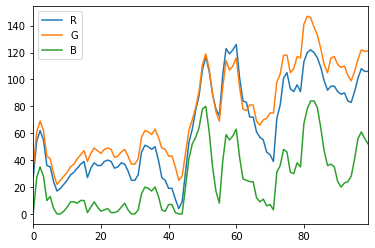

In [78]:
cat_1_pd[:100].plot()

In [93]:
cat_1_pd.loc[12:23]

,R,G,B
12,31,37,9
13,34,41,8
14,37,44,10
15,39,47,10
16,27,39,1
17,34,45,5
18,38,49,9
19,36,47,5
20,36,45,2
21,39,48,3


In [118]:
def np_sorted(a, col='R', shape=(1,1,3)):
    tmp = np.array(a.sort_values(col), dtype='uint8')
    return tmp.reshape(shape)

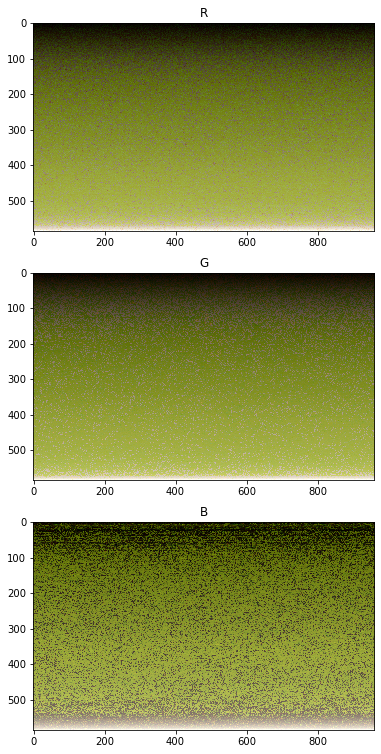

In [129]:
cat2 = cat_1_pd.sort_values('R')
np2 = np.array(cat2, dtype='uint8')
shape = cat_1_np.shape
np2_n = np2.reshape(shape[0], shape[1], shape[2])
fig, axis = plt.subplots(3, figsize=(13,13))
cat2_r = np_sorted(cat_1_pd, 'R', cat_1_np.shape)
cat2_g = np_sorted(cat_1_pd, 'G', cat_1_np.shape)
cat2_b = np_sorted(cat_1_pd, 'B', cat_1_np.shape)
axis[0].imshow(cat2_r)
axis[1].imshow(cat2_g)
axis[2].imshow(cat2_b)

for i, c in enumerate("RGB"):
    axis[i].set_title(c)


# plt.imshow(cat_1_np)


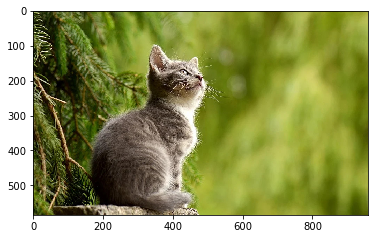

In [130]:
plt.imshow(cat_1_np)

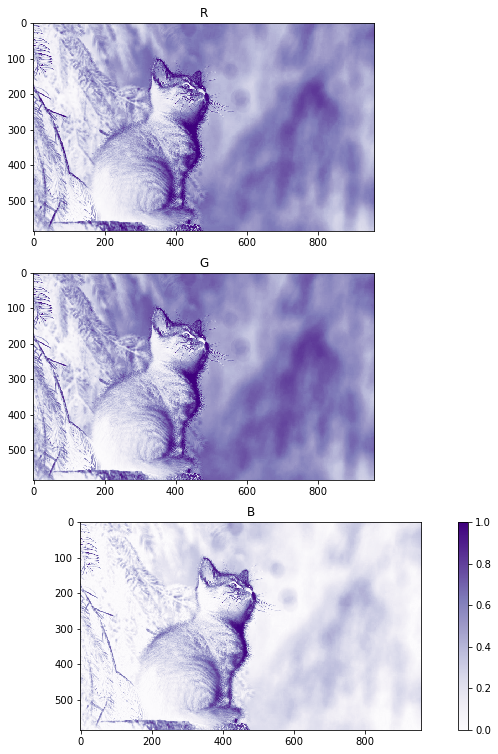

In [153]:
fig, axis = plt.subplots(nrows=3, figsize=(13,13))
for i,c in enumerate("RGB"):
    axis[i].set_title(c)
cat3_r = cat_1_np[:,:,0]
cat3_g = cat_1_np[:,:,1]
cat3_b = cat_1_np[:,:,2]

cmap = 'Purples'
fig.colorbar(matplotlib.cm.ScalarMappable(cmap=cmap))

for (px, cx) in zip(axis, [cat3_r,cat3_g,cat3_b]):
    px.imshow(cx, cmap=cmap)